In [158]:
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy.misc import imread
from skimage.filters import median
from skimage.morphology import disk

from skimage.color.adapt_rgb import adapt_rgb
from skimage.color.adapt_rgb import hsv_value, each_channel

import cv2

plt.ion()

In [39]:
base_dir = "/home/noorvir/Documents/data/scenenet_data/val/SceneNetRGBD-val/val/0"



In [40]:
def view_images(sp, i):
    sp = str(sp)
    i = str(i)
    p = os.path.join(base_dir, sp)
    instancep = os.path.join(p, 'instance', i +".png")
    depthp = os.path.join(p, 'depth', i + ".png")
    rgbp = os.path.join(p, "photo", i + ".jpg")
    
    ins = imread(instancep)
    dp = imread(depthp)
    rgb = imread(rgbp)
    
    plt.figure()
    plt.imshow(ins)
    plt.figure()
    plt.imshow(dp)
    plt.figure()
    plt.imshow(rgb)
    
    return rgb, dp, ins
    

/home/noorvir/.pyenv/versions/3.5.3/envs/python3-ml/lib/python3.5/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':
/home/noorvir/.pyenv/versions/3.5.3/envs/python3-ml/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.
/home/noorvir/.pyenv/versions/3.5.3/envs/python3-ml/lib/python3.5/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()


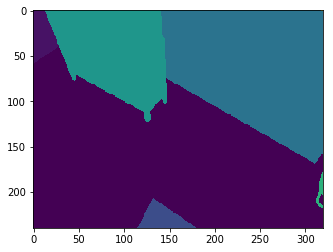

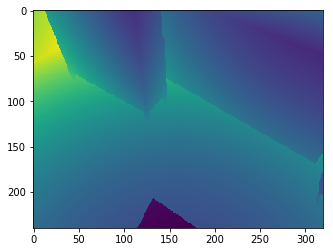

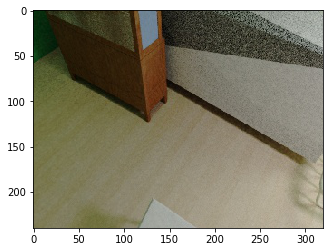

In [41]:
r, d, ins = view_images(37,0)

In [169]:
def gaussian_blur(im=None, k=5, sigma=1):
    kwargs = {'ksize': k,
              'sigmaX': sigma}

    def blur(image):
        return cv2.GaussianBlur(image, **kwargs)

    if im is None:
        return blur
    else:
        return blur(im)


def normalise(im=None, max_val=1, log_scale=False, adaptation='rgb'):
    """

    Parameters
    ----------
    im
    max_val: int
    adaptation

    log_scale: bool

    Returns
    -------

    """
    adapt = hsv_value if adaptation == 'hsv' else each_channel

    @adapt_rgb(adapt)
    def f(image):
        if log_scale:
            image = np.log10(np.clip(image, 0.001, 10 ** 10))

        return max_val * (image - image.min())/(image.max() - image.min())

    if im is None:
        return f
    else:
        return f(im)


def gradient(im=None, blur=None, adaptation='rgb'):

    adapt = hsv_value if adaptation == 'hsv' else each_channel

    @adapt_rgb(adapt)
    def f(image):

        if blur is not None:
            image = blur(image)

        sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
        sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

        return np.sqrt((sobelx ** 2) + (sobely ** 2))

    if im is None:
        return f
    else:
        return f(im)


def laplacian(im=None, blur=None, adaptation='rgb'):

    adapt = hsv_value if adaptation == 'hsv' else each_channel

    @adapt_rgb(adapt)
    def f(image):

        if blur is not None:
            image = blur(image)

        limg = cv2.Laplacian(image, cv2.CV_64F)
        limg = (limg - limg.min()) / (limg.max() - limg.min())

        return limg

    if im is None:
        return f
    else:
        return f(im)


def median(im=None, disk_size=2, adaptation='rgb'):

    adapt = hsv_value if adaptation == 'hsv' else each_channel

    @adapt_rgb(adapt)
    def f(image):
        return cv2.medianBlur(image, disk_size)

    if im is None:
        return f
    else:
        return f(im)


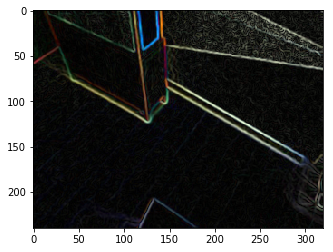

In [170]:
plt.imshow(normalise()(gradient(adaptation='rgb')(r)))

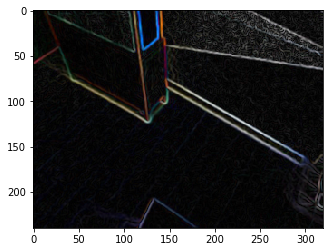

In [171]:
plt.imshow(normalise(adaptation='hsv')(gradient()(r)))

(240, 320, 3)
0.059678666571974286
0.6081932994827739
0.11726689345283038


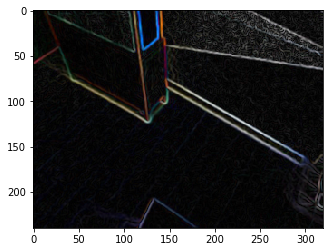

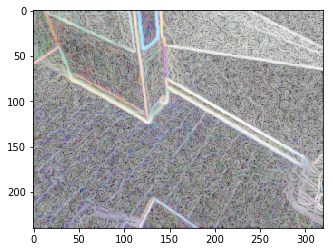

In [173]:
grad_im = gradient(r)
print(grad_im.shape)
grad_im = (grad_im - grad_im.min())/(grad_im.max() - grad_im.min())

log_im = np.log10(np.clip(gradient(r), 1, 10000))
plt.imshow(grad_im)

log_im = (log_im - log_im.min())/(log_im.max() - log_im.min())
plt.figure()
plt.imshow(log_im)


print(grad_im.mean())
print(log_im.mean())
print(log_im.std())

In [134]:
108 **2

11664

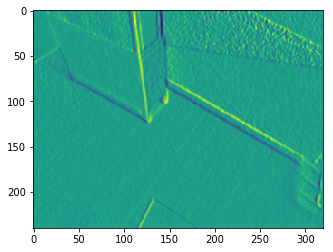

In [56]:
plt.imshow(gradient(r)[:,:,0] + gradient(r)[:,:,1])

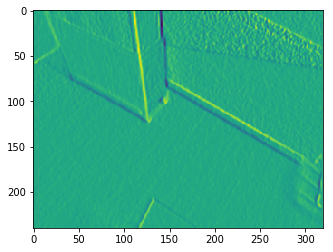

In [57]:
plt.imshow(gradient(r)[:,:,0])

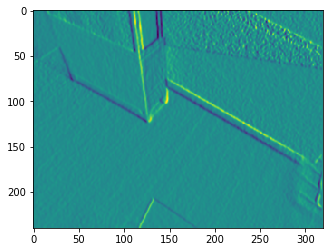

In [58]:
plt.imshow(gradient(r)[:,:,1])

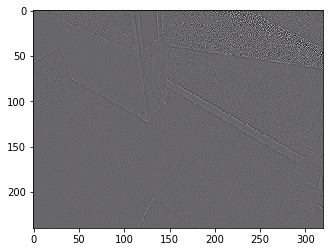

In [118]:
gb = gaussian_blur((5,5), 5)

limg = laplacian(r, gb)
limg = (limg - limg.min())/(limg.max() - limg.min())
plt.imshow(limg)

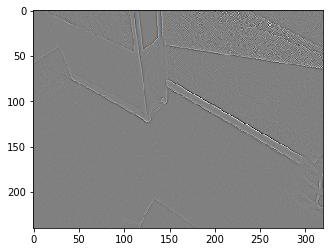

In [111]:
limg = laplacian(median_color(r, 2))

limg = (limg - limg.min())/(limg.max() - limg.min())
plt.imshow(limg)

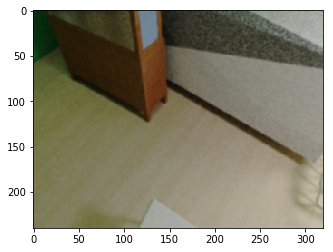

In [116]:
gb = gaussian_blur((3,3), 2)

plt.imshow(gb(r))